# Unsupervised learning practice for red wine characteristics



First, import the red wine csv file into a pandas dataframe from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Use the wine quality data set to answer the following questions. Present any figures that assist you in your analysis.







## Import data

In [ ]:
# import libraries and some settings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

In [ ]:
# import data of red wine
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# scale data
scaler = StandardScaler().fit(red)
X = scaler.transform(red)   
X

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [ ]:
#X = pd.DataFrame(scale(red), index=red.index, columns=red.columns)

## Q1. K Means Cluster

Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

### n=2 clusters: high quality wines and low quality wines

In [ ]:
km = KMeans(n_clusters=2, n_init=20)
km.fit(X)
y_km2 = km.predict(X)

In [ ]:
# Add new labels to original data and explore what clusters mean by evaluating column means.
X_df = pd.DataFrame(X, columns = red.columns)
X_df['cluster'] = y_km2

# means for full scaled data
display(X_df.groupby('cluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.509265,0.418390,-0.570319,-0.073051,-0.133948,0.102514,0.142544,-0.224035,0.388743,-0.325572,-0.166682,-0.266533
1,0.889901,-0.731104,0.996589,0.127651,0.234064,-0.179136,-0.249085,0.391484,-0.679299,0.568912,0.291263,0.465746


<font color = navy> Wines with higher quality have higher fixed acidity, lower volatile acidity, higher citric acid, lower pH, and higher sulphates. While wines with lower quality have lower fixed acidity, higher volatile acidity, lower citric acid, higher pH, and lower sulphates. 

<font color = navy> High quality wines also have higher residual sugar, higher chlorides, lower free sulfur dioxide and total sulfur dioxide, higher density, and higher alcohol than low quality wines. However, these differences are not large.

<font color = navy> If you want to make a good bottle of wine, then according to this analysis the most important characteristics include: high fixed acidity, low volatile acidity, high citric acid, low pH, and high sulphates.

### Determine number of clusters using Elbow curve

Text(0.5, 1.0, 'Elbow curve')

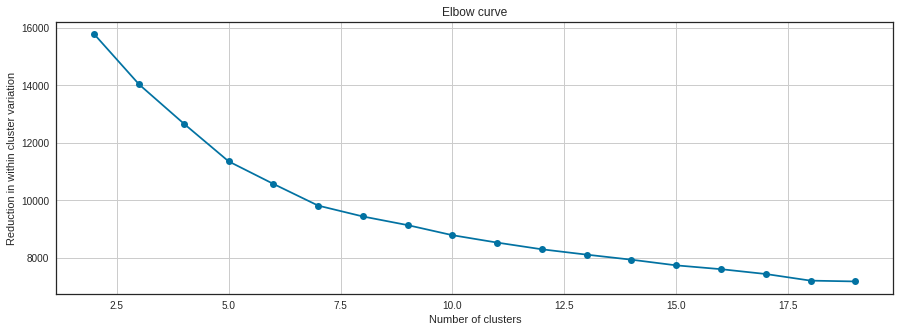

In [ ]:
within_cluster_variance = [] # initiate empty list with no data

# build models for range of ks from 2 to 20
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')  #Choose k at elbow of plot as a general rule.  We want a small enough number of categories to 
                          # such that we can still learn something meaningful from them via exploration of our variables.

<font color = navy> Thers is no very distinct elbow seen in the curve. 5 seems a small elbow and 7 is another one. So I try both 5 and 7.

### n=5 clusters

In [ ]:
km5 = KMeans(n_clusters=5, n_init=20)
km5.fit(X)

X_df['cluster5'] = km5.labels_
display(X_df.groupby('cluster5').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
cluster5,,,,,,,,,,,,,
0,1.367270,-0.674977,1.140048,0.198292,-0.014903,-0.538583,-0.523448,0.833230,-0.841194,0.330386,0.172104,0.402409,1.000000
1,-0.078895,0.085668,0.098161,0.433196,0.037128,1.085767,1.381157,0.384663,-0.156750,-0.184107,-0.618165,-0.463049,0.176829
2,-0.483685,0.675532,-0.791517,-0.231587,-0.078366,-0.401776,-0.384522,-0.095559,0.409664,-0.419668,-0.425757,-0.465275,0.005425
3,-0.599699,-0.485038,-0.108176,-0.221834,-0.380796,0.184010,-0.201640,-1.139002,0.528551,0.200265,1.215054,0.832554,0.404834
4,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695,1.000000


<font color = navy> Wines with higher quality are in cluster 0 and cluster 3. They have lower volatile acidity, medium sulphates, and higher alcohol. They sort of have lower chlorides and lower total sulfur dioxide, but the result is not consistent.

<font color = navy> If you want to make a good bottle of wine, then according to this analysis the most important characteristics are low volatile acidity, high alcohol, and maybe medium sulphates.

### n=7 clusters

In [ ]:
km7 = KMeans(n_clusters=7, n_init=20)
km7.fit(X)

X_df['cluster7'] = km7.labels_
display(X_df.groupby('cluster7').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,cluster5
cluster7,,,,,,,,,,,,,,
0,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761,0.470588,0.852941
1,-0.429550,0.669815,-0.780727,-0.196631,-0.048772,-0.486433,-0.411469,0.009922,0.343649,-0.416408,-0.509178,-0.519317,0.006135,1.993865
2,-1.074306,0.339860,-0.907347,-0.273202,-0.409824,0.269831,-0.168842,-1.322879,1.136815,-0.129415,1.163520,0.512474,0.000000,2.766169
3,1.675062,-0.557716,1.233276,0.120978,0.055737,-0.495773,-0.440466,1.199905,-0.988714,0.228723,-0.134267,0.088695,1.000000,0.012712
4,0.265671,-0.996767,0.755654,-0.099519,-0.242150,-0.339035,-0.535522,-0.507150,-0.256653,0.464871,1.015436,1.036154,0.893773,1.717949
5,-0.122608,0.025354,0.057921,-0.022058,-0.039873,0.996220,1.228121,0.205587,-0.098346,-0.173120,-0.571036,-0.420264,0.160237,1.172107
6,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695,1.000000,4.000000


<font color = navy> Wines with higher quality are in cluster 2 and cluster 4. They have lower volatile acidity, and higher alcohol. They sort of have lower chlorides, lower total sulfur dioxide, and medium sulphates, but again the result is not consistent. 

<font color = navy> If you want to make a good bottle of wine, then according to this analysis the most important characteristics are low volatile acidity and high alcohol.

### Determine number of clusters using Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.20943793397984056
For n_clusters = 3 The average silhouette_score is : 0.17351094019667213
For n_clusters = 4 The average silhouette_score is : 0.18956707451333057
For n_clusters = 5 The average silhouette_score is : 0.18083840762927558
For n_clusters = 6 The average silhouette_score is : 0.18035312057957686
For n_clusters = 7 The average silhouette_score is : 0.1761239618892161
For n_clusters = 8 The average silhouette_score is : 0.14191269233682755
For n_clusters = 9 The average silhouette_score is : 0.14501446380444585


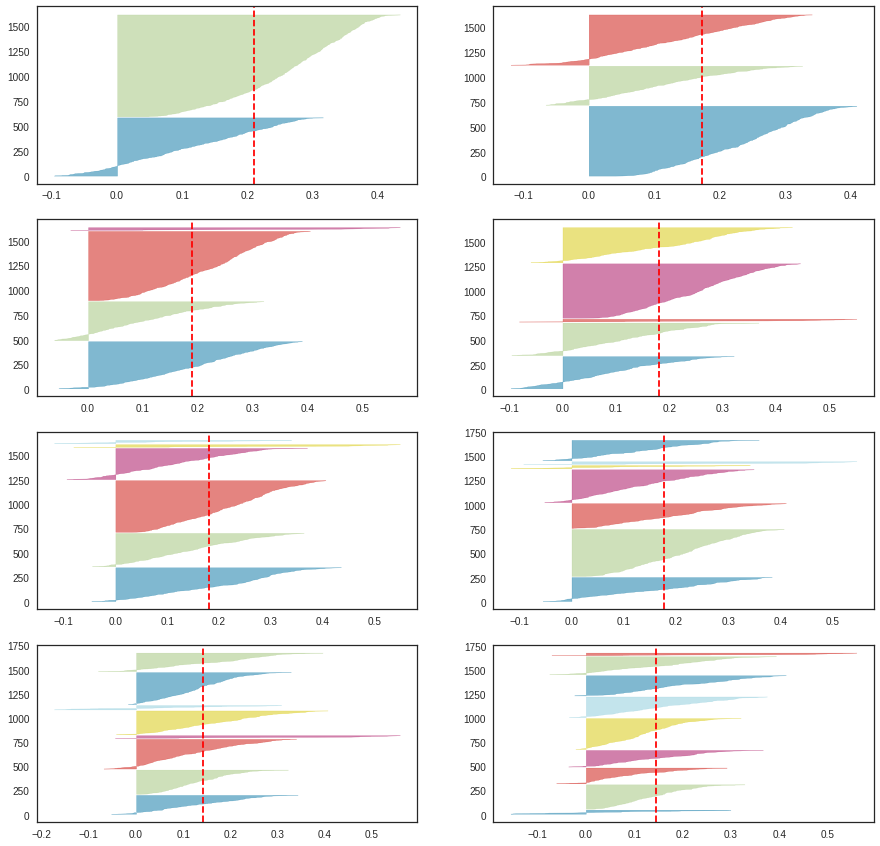

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

fig,ax = plt.subplots(4,2,figsize=(15,15))
for i in [2,3,4,5,6,7,8,9]:
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i,2)
    
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =",i,"The average silhouette_score is :", silhouette_avg)
          
    visualizer = SilhouetteVisualizer(km, colors= 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

<font color = navy> The Silhouette score for n=2 is the highest, so I stick with the doing of n=2.
If you want to make a good bottle of wine, then according to this analysis the most important characteristics include: high fixed acidity, low volatile acidity, high citric acid, low pH, and high sulphates.
From all of the above analyses, we are confident that low volatile acidity is one characteristic that good wine should have.

## Q2. Hierarchical Cluster

Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, # note that we select the clusters to be 2 following question 1
                             affinity='euclidean', 
                             linkage='complete')
y_ac2 = ac.fit_predict(X)
X_df['acluster'] = y_ac2  # extract cluster labels for each observation in data

# means for full scaled data
display(X_df.groupby('acluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,cluster5,cluster7
acluster,,,,,,,,,,,,,,,
0,-0.000094,0.000440,-0.003917,-0.000054,-0.013922,-0.000494,-0.000401,-0.000965,0.003336,-0.007182,0.001203,0.001762,0.363181,1.587351,2.841578
1,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158,1.000000,4.000000,6.000000


<font color = navy> Wines with higher quality have lower citric acid, lower chlorides, lower density, higher pH, lower sulphates, and higher alcohol. While wines with lower quality have higher citric acid, higher chlorides, higher density, lower pH, higher sulphates, and lower alcohol.

<font color = navy> High quality wines also have lower fixed acidity, higher volatile acidity, lower residual sugar, lower free sulfur dioxide, lower total sulfur dioxide than low quality wines. However, these differences are not large.

<font color = navy> If you want to make a good bottle of wine, then according to this analysis the most important characteristics include: low citric acidity, low chlorides, low density, high pH, low sulphates, and high alcohol.

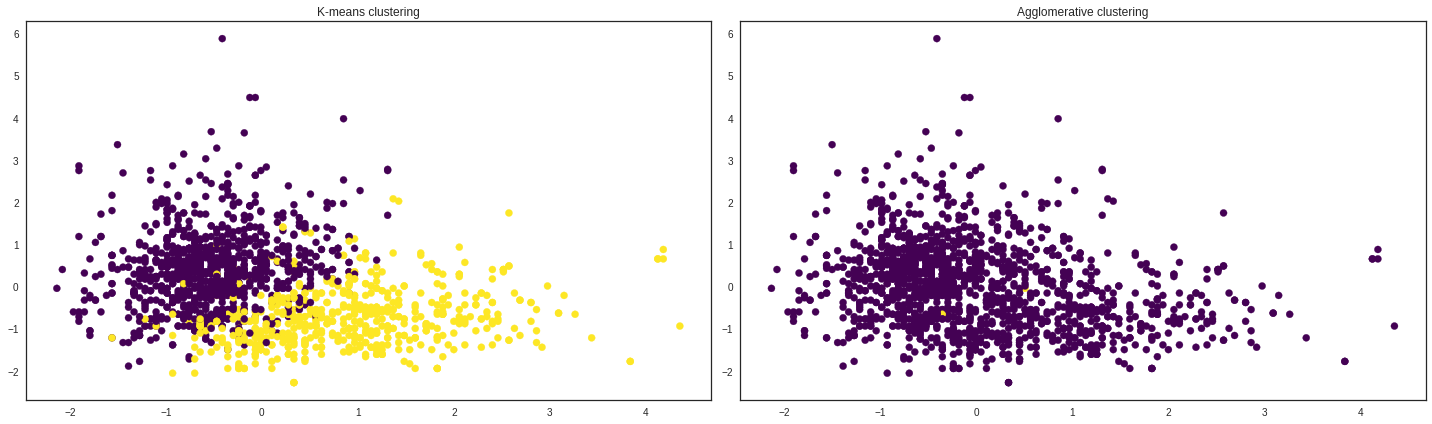

In [ ]:
#compare k-means and hierachical cluster
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.scatter(X[:, 0], X[:, 1], c=y_km2, s=50, cmap='viridis')
ax1.set_title('K-means clustering')

ax2.scatter(X[:, 0], X[:, 1], c=y_ac2, s=50, cmap='viridis')
ax2.set_title('Agglomerative clustering')

plt.tight_layout()
plt.show()

<font color = navy> The conclusions using Hierarchical clustering are different from that using k means clustering. From the above figure of first two features, we can see that these two algorithms generate rather different results of clustering. 

## Q3. PCA

Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [ ]:
red.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [ ]:
red.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [ ]:
#scale data
red_scaled = pd.DataFrame(scale(red), index=red.index, columns=red.columns)

# PCA loading vectors
pca = PCA()
pca_loadings = pd.DataFrame(pca.fit(red_scaled).components_.T, index=red.columns, columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12'])
pca_loadings.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578,-0.182956,-0.256438,0.638580
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223,0.155106,0.377161,0.004662
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975,0.346086,0.624328,-0.070037
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187,-0.052237,0.088078,0.183646
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936,-0.003863,-0.208617,0.053931


In [ ]:
# transform scaled data to get the principal components
pca = PCA()
red_pc = pd.DataFrame(pca.fit_transform(red_scaled), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'], index=red_scaled.index)
red_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362


In [ ]:
pca.explained_variance_ratio_

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

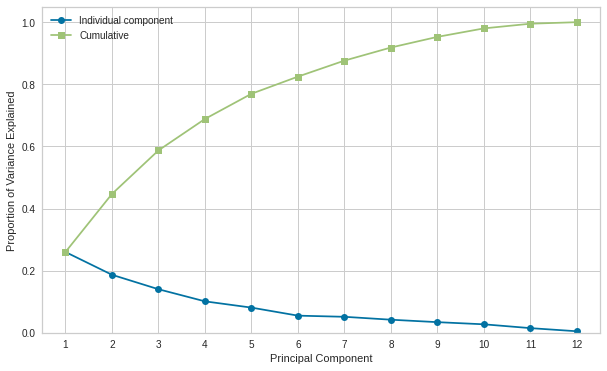

In [ ]:
plt.figure(figsize=(10,6))

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.5,12.5)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(loc=2);

In [ ]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.44692081170691705

<font color = navy> The first two principal components explain 44.69% of the variation in the red wine data.

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(red_scaled)
sum(pca2.explained_variance_ratio_)

0.446920811706917

In [ ]:
# transform scaled data to get the first two principal components
pca2 = PCA(n_components=2)
red_pc2 = pd.DataFrame(pca2.fit_transform(red_scaled), columns=['PC1','PC2'], index=red_scaled.index)
red_pc2.head()

,PC1,PC2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303


<font color = navy> We can use PCA to reduce the dimension of wine data by retaining only the first two principal components, which explain about 45% variation of this dataset, and removing noise effects. Transforming back, red_pc2 now contains the two most "important "components "PC1" and "PC2" in the sense that they capture the most variations. Now we can do supervised learning with red_pc2 on some other variable tied to wine, e.g. wine prices.